# Objective:

To build a model to predict the quality of the wine.

### Import necessary libraries

In [2]:
pip install xgboost 

     |████████████████████████████████| 1.2 MB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [94]:
whitewine = pd.read_csv('winequality-white.csv',sep=';')
readwine = pd.read_csv('winequality-red.csv',sep=';')

In [95]:
# copying data to another varaible to avoid any changes to original data
databk1 = whitewine.copy()
databk2 = readwine.copy()

### View the first and last 5 rows of the dataset.

In [96]:
databk1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [97]:
databk2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [98]:
databk1.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [99]:
databk2.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

### Understand the shape of the dataset.

In [100]:
databk1.shape

(4898, 12)

In [101]:
databk2.shape

(1599, 12)

### Check the data types of the columns for the dataset.

In [38]:
databk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [39]:
databk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observations-**
* All features are numeric type.
* There are no missing values in the data.

### Summary of the dataset.

In [102]:
databk1.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

In [103]:
databk2.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

**Observations-**
* The maximum rating of wine is 9 and the third quartile value is 6 i.e. at least 75% of wines have rating 6 or below.
* There might be outliers in data where the wines have high sulfur dioxide (free sulfur dioxide and total sulfur dioxide) content as there is a big difference in 3rd quartile and maximum values.
* Most wines are on a pH scale between 3 and 4.

### EDA

### Univariate analysis

In [20]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on fixed acidity

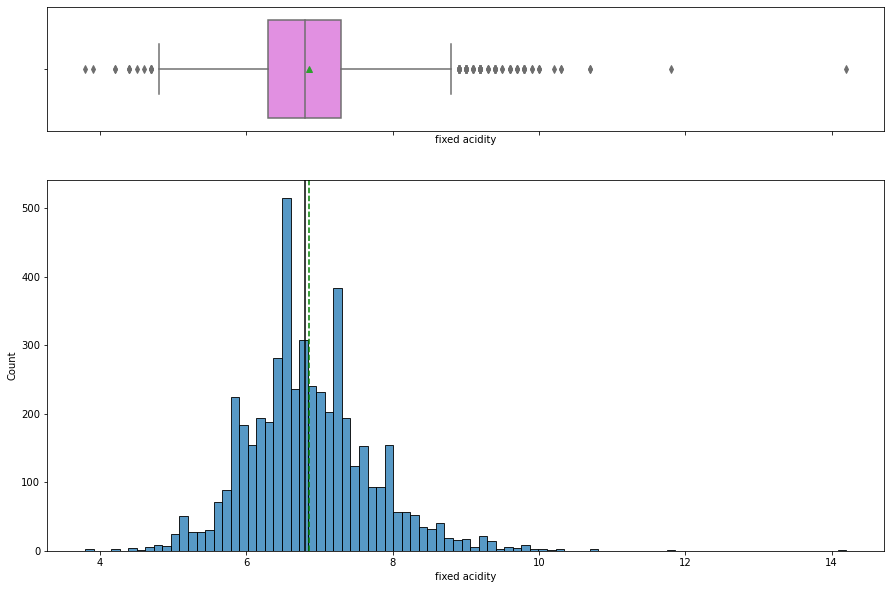

In [18]:
histogram_boxplot(databk1['fixed acidity'])

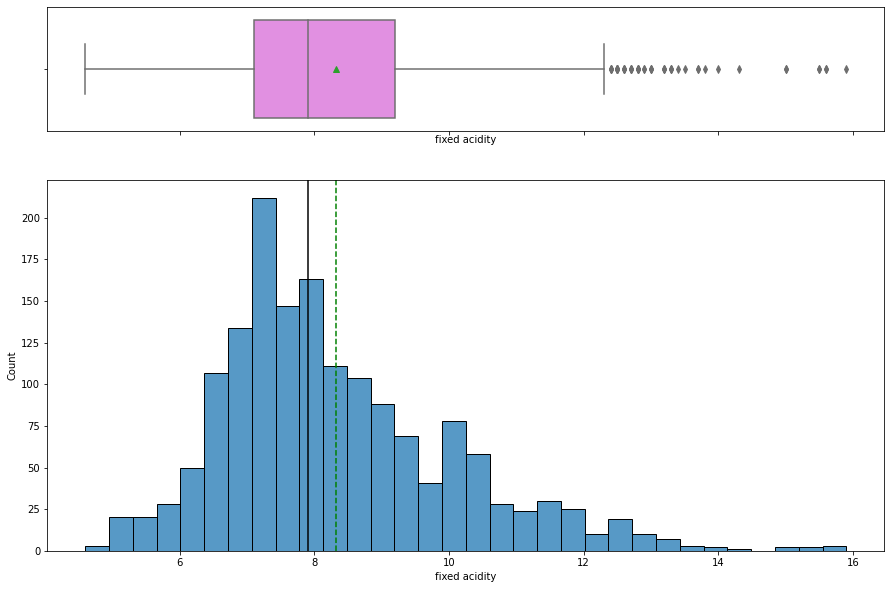

In [19]:
histogram_boxplot(databk2['fixed acidity'])

* The distribution is nearly symmetric with some outliers to the right. The mean and median values are close to 8 g/dm^3
* The outliers present to the right indicate some wines have higher acidity than others.

### Observations on volatile acidity

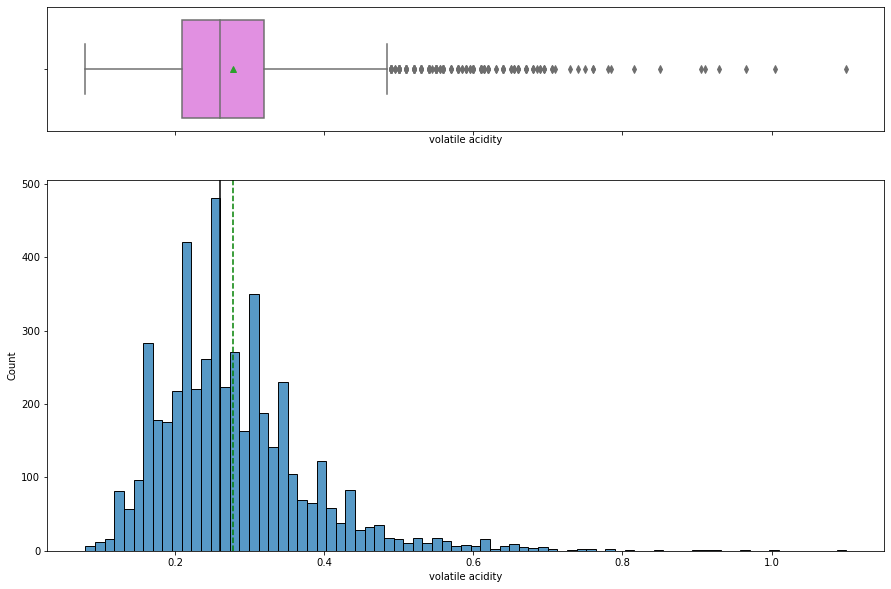

In [21]:
histogram_boxplot(databk1['volatile acidity'])

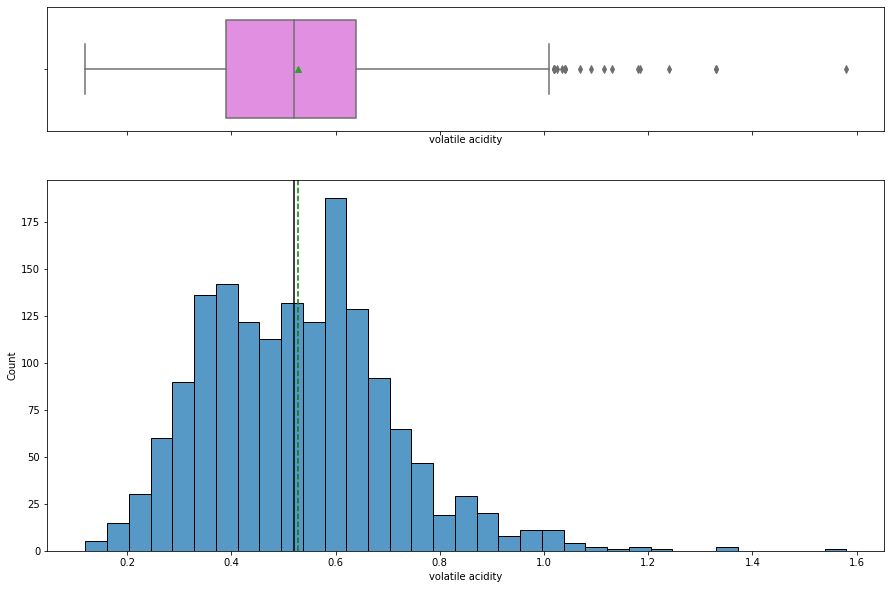

In [22]:
histogram_boxplot(databk2['volatile acidity'])

* Volatile acidity has a fairly normal distribution with mean and median equal to 0.5.
* Some wines have higher amount of acetic acid that would result in a vinegar like taste of wine, possibly such wines would be rated lower in quality.

### Observations on citric acid

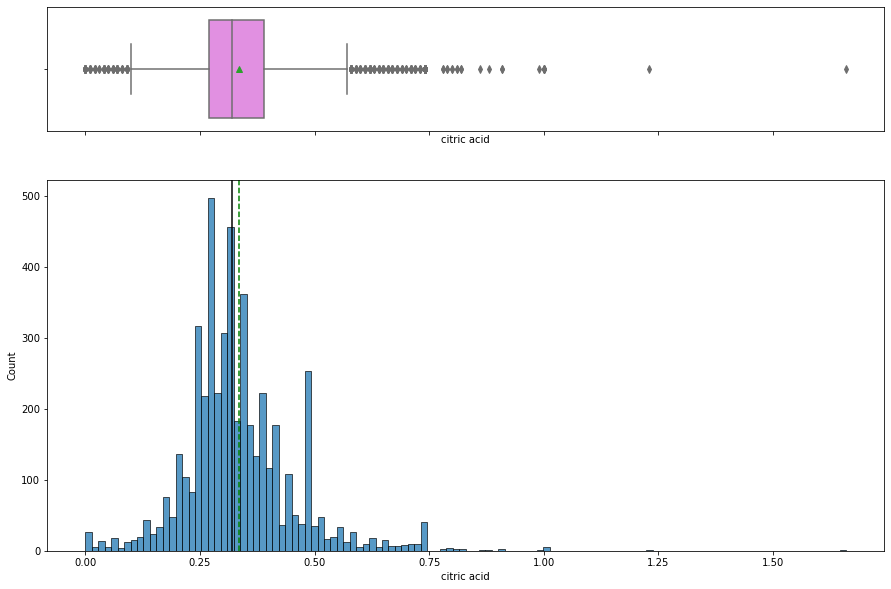

In [23]:
histogram_boxplot(databk1['citric acid'])

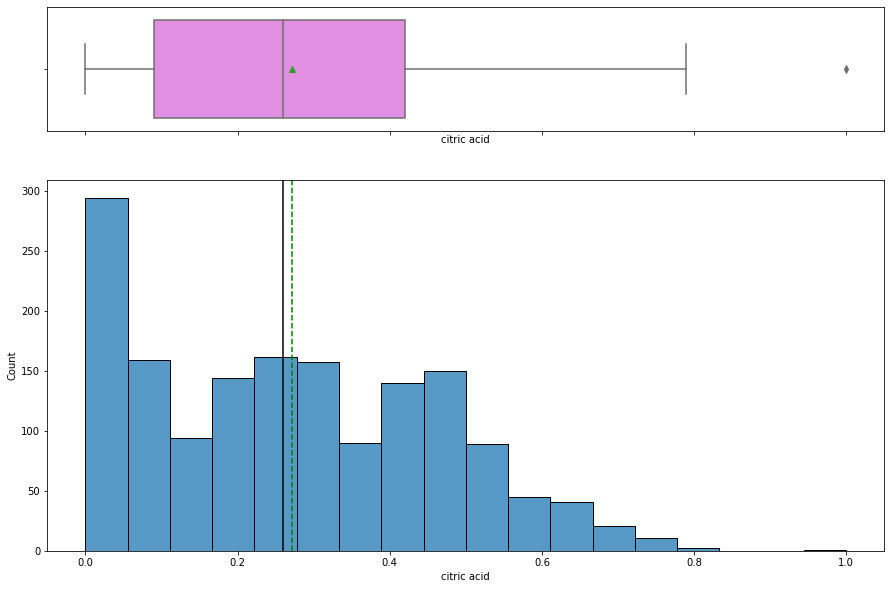

In [24]:
histogram_boxplot(databk2['citric acid'])

* Citric acidity has a slightly right skewed distribution with mean and median equal to 0.25.
* There is one outlier to the right with high value of citric acid.

### Observations on residual sugar

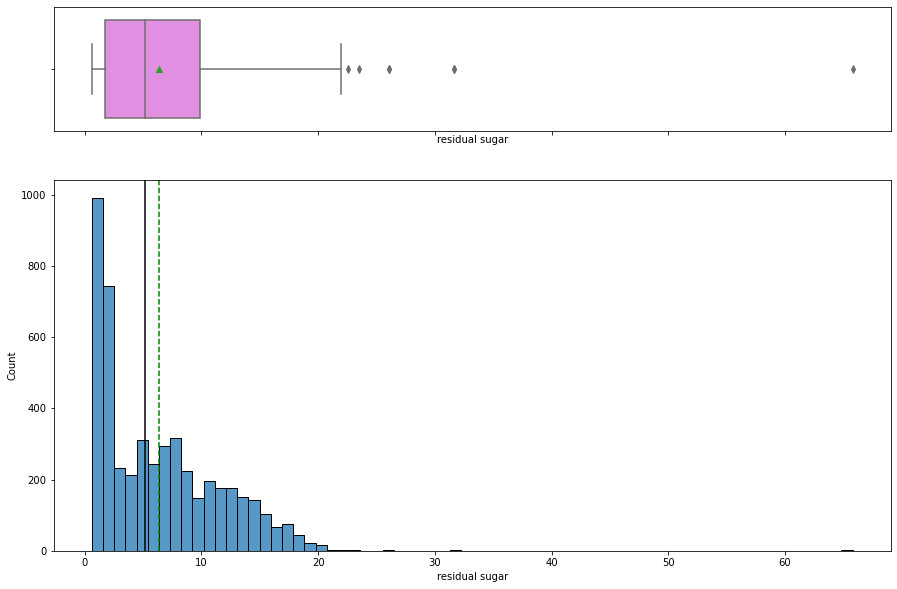

In [25]:
histogram_boxplot(databk1['residual sugar'])

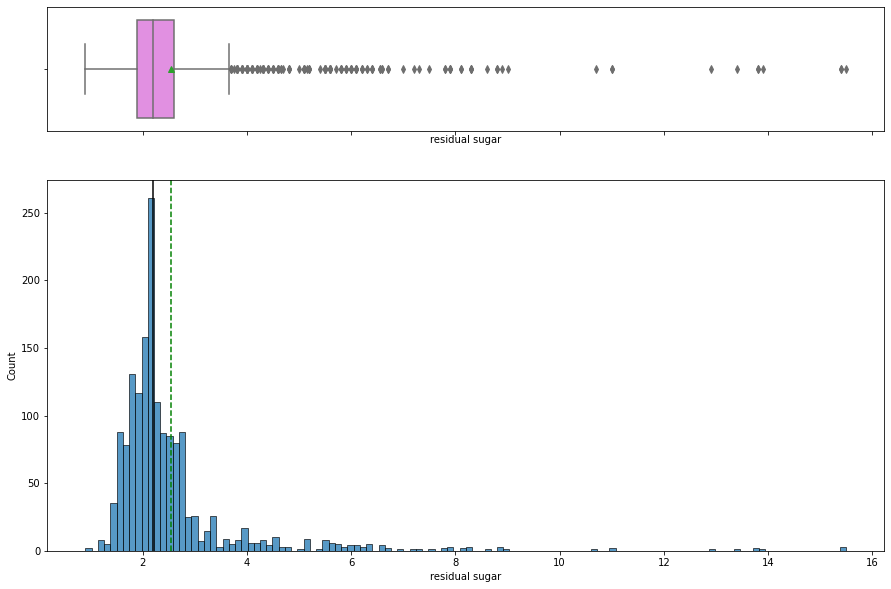

In [26]:
histogram_boxplot(databk2['residual sugar'])

* Thee distribution of the variable is skewed to the right and there are many extreme values.
* Lesser residual sugar wines(< 1) are rare and we can see that majority of wines are concentrated around 1.5 - 2.5 g/dm^3 i.e. most of the wine have normal residual sugar. 

### Observations on chlorides

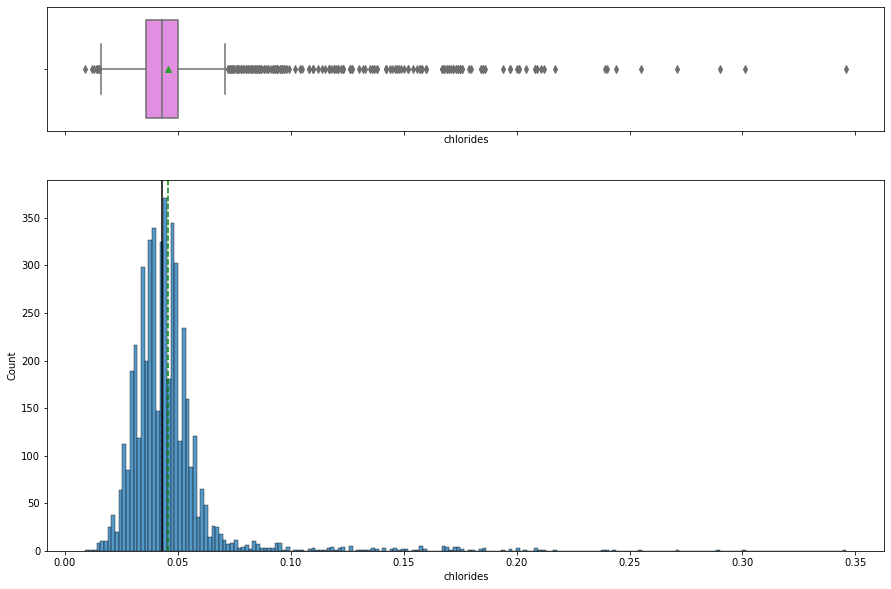

In [27]:
histogram_boxplot(databk1['chlorides'])

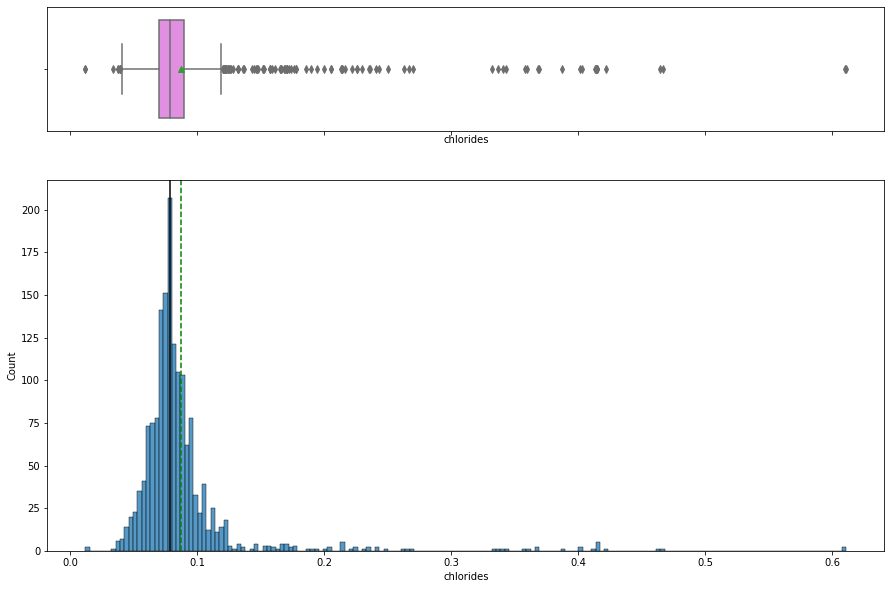

In [28]:
histogram_boxplot(databk2['chlorides'])

* chlorides has a bell shaped curve distribution.
* From boxplot, we can see that there are outliers on both the sides of whiskers.

### Observations on free sulfur dioxide

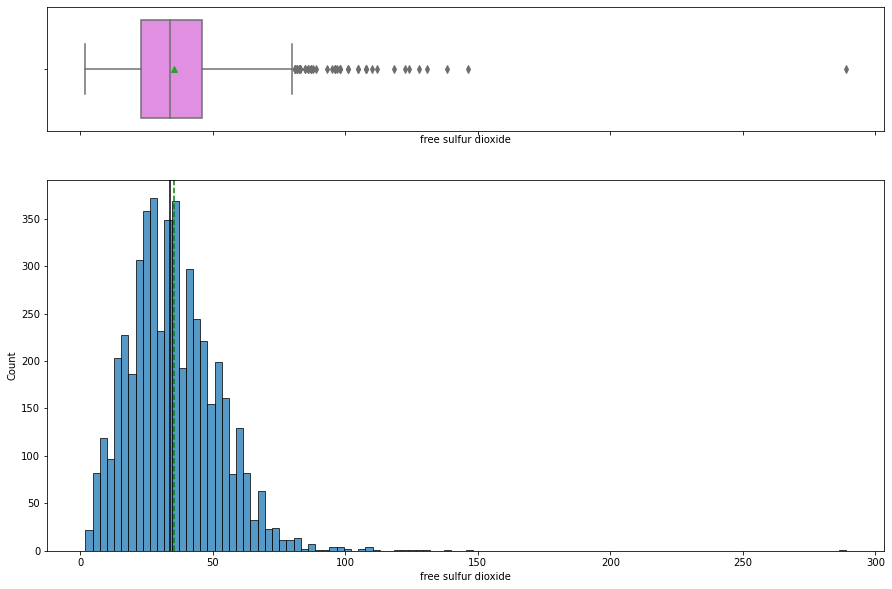

In [29]:
histogram_boxplot(databk1['free sulfur dioxide'])

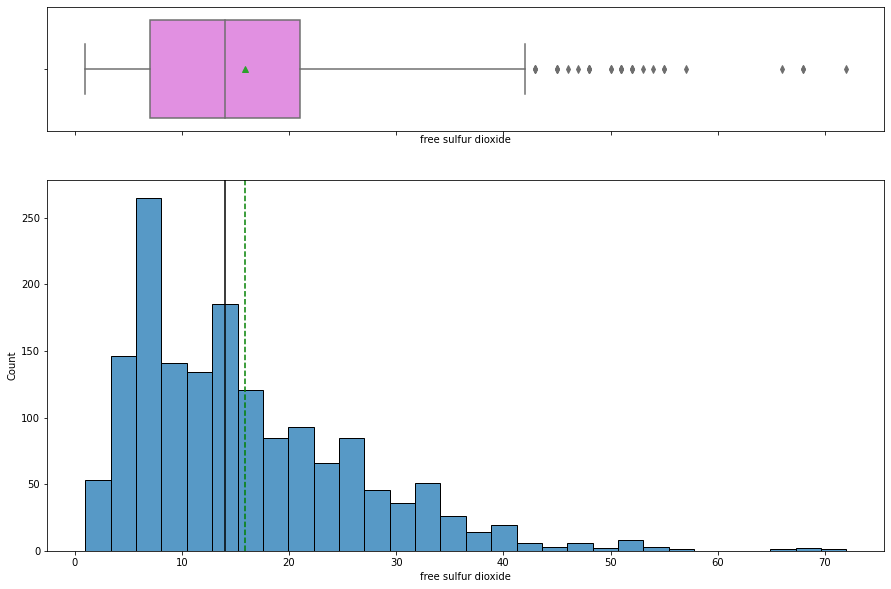

In [30]:
histogram_boxplot(databk2['free sulfur dioxide'])

* Distribution of free sulfur dioxide is skewed to the right.
* From boxplot, we can see that there are outliers - some wines have high free sulfur dioxide concentration.

### Observations on total sulfur dioxide

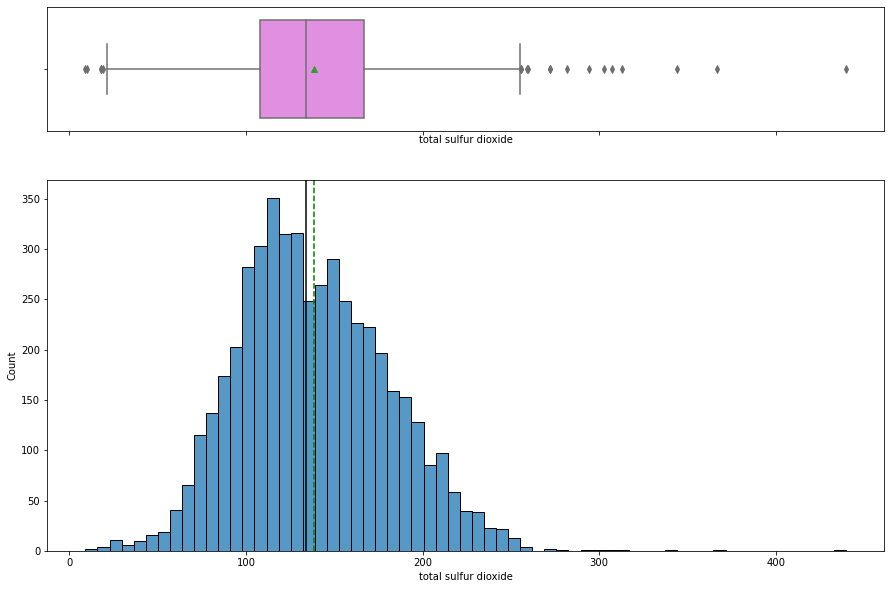

In [31]:
histogram_boxplot(databk1['total sulfur dioxide'])

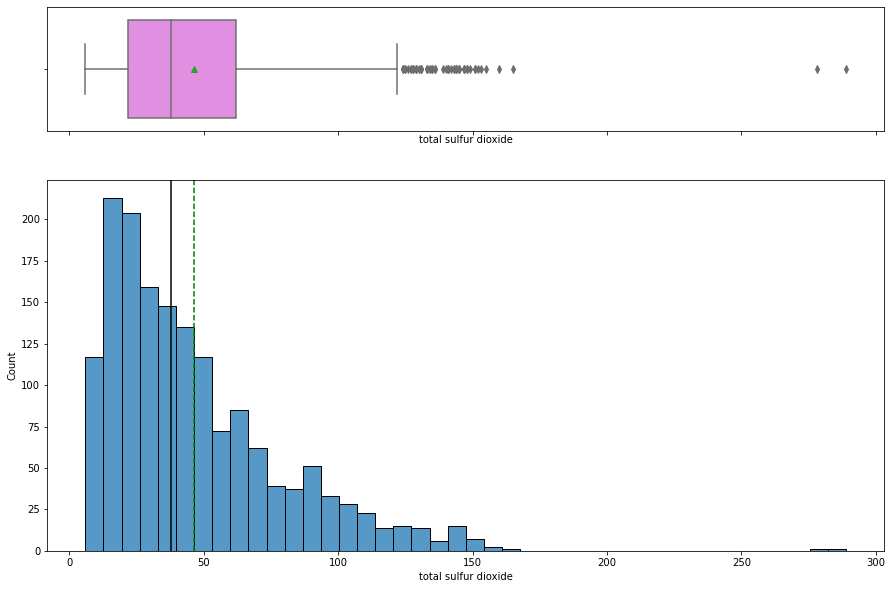

In [32]:
histogram_boxplot(databk2['total sulfur dioxide'])

* Distribution of total sulfur dioxide concentration is right-skewed. 
* From boxplot, we can see that there are outliers in this variables having higher total sulfur dioxide concentration than others.
* The two extreme values to the right can be considered at outliers. We can cap these value to the next value.

In [35]:
#Calculating top 5 values
databk1['total sulfur dioxide'].sort_values(ascending=False).head()

4745    440.0
1417    366.5
2127    344.0
325     313.0
1931    307.5
Name: total sulfur dioxide, dtype: float64

In [36]:
databk2['total sulfur dioxide'].sort_values(ascending=False).head()

1081    289.0
1079    278.0
354     165.0
1244    160.0
651     155.0
Name: total sulfur dioxide, dtype: float64

In [37]:
#Capping the two extreme values
databk1['total sulfur dioxide']=databk1['total sulfur dioxide'].clip(upper=165)

In [38]:
databk2['total sulfur dioxide']=databk2['total sulfur dioxide'].clip(upper=165)

### Observations on density

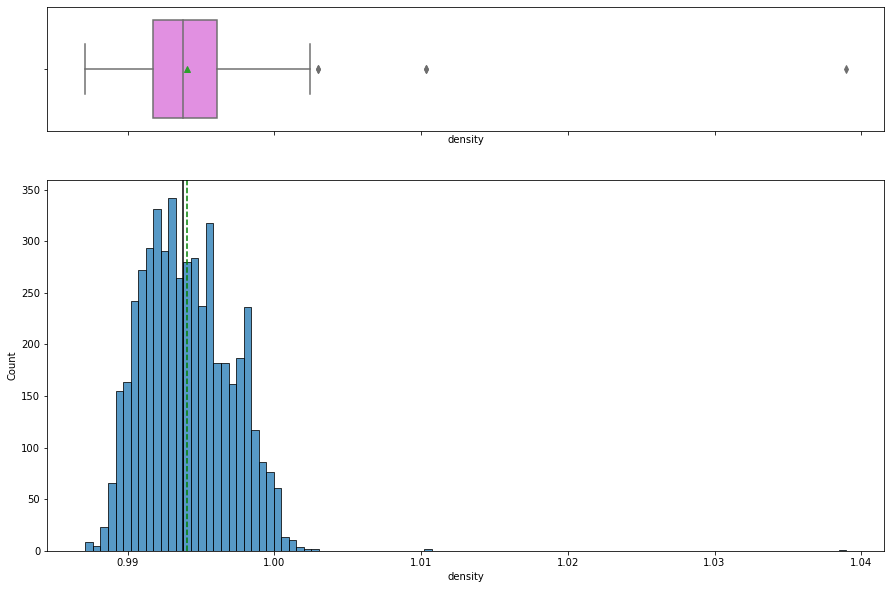

In [39]:
histogram_boxplot(databk1['density'])

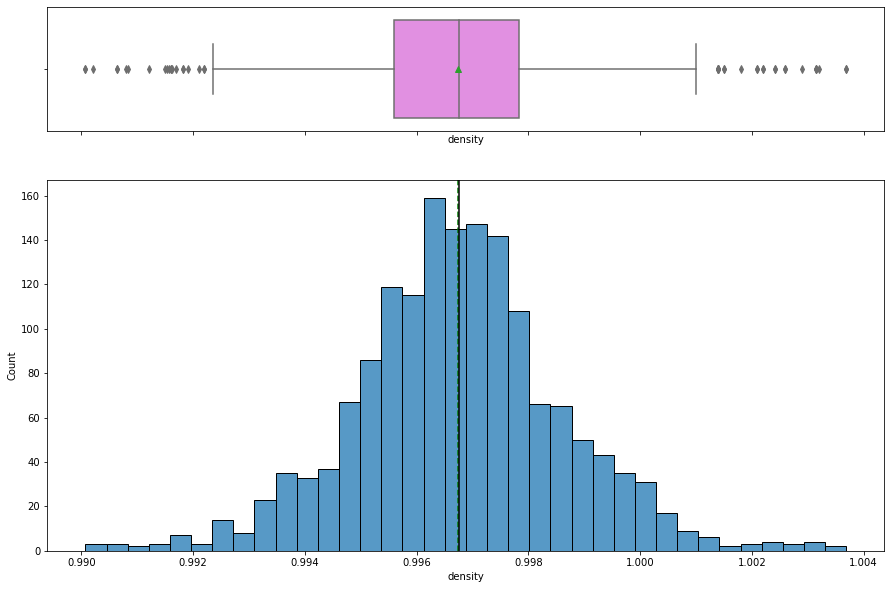

In [40]:
histogram_boxplot(databk2['density'])

* Distribution of density follows a normal distribution with mean and median equal to ~0.997.
* From boxplot, we can see that there are outliers on both the sides of whiskers indicating some wines are too dense and some very less dense.

### Observations on pH

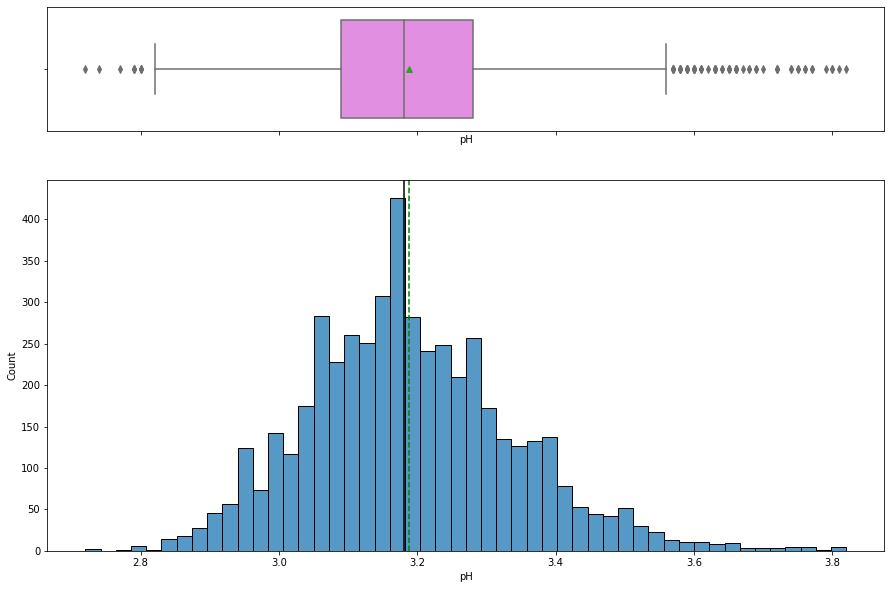

In [41]:
histogram_boxplot(databk1['pH'])

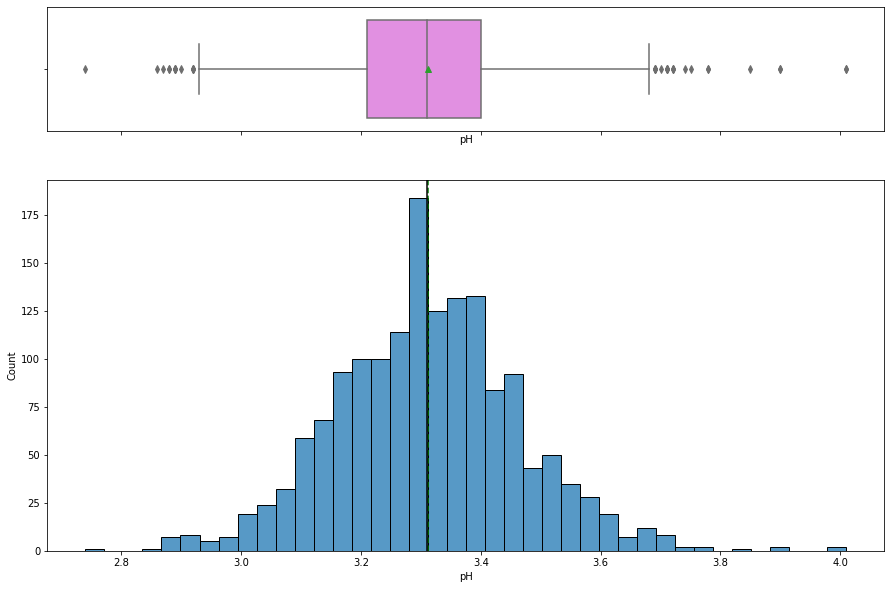

In [42]:
histogram_boxplot(databk2['pH'])

* Distribution of pH looks normally distributed with mean and median equal to ~3.3, most wines have a pH value around 3.3 i.e. most wines are acidic in nature.
* From boxplot, we can see that there are outliers on both the sides of whiskers.

### Observations on sulphates

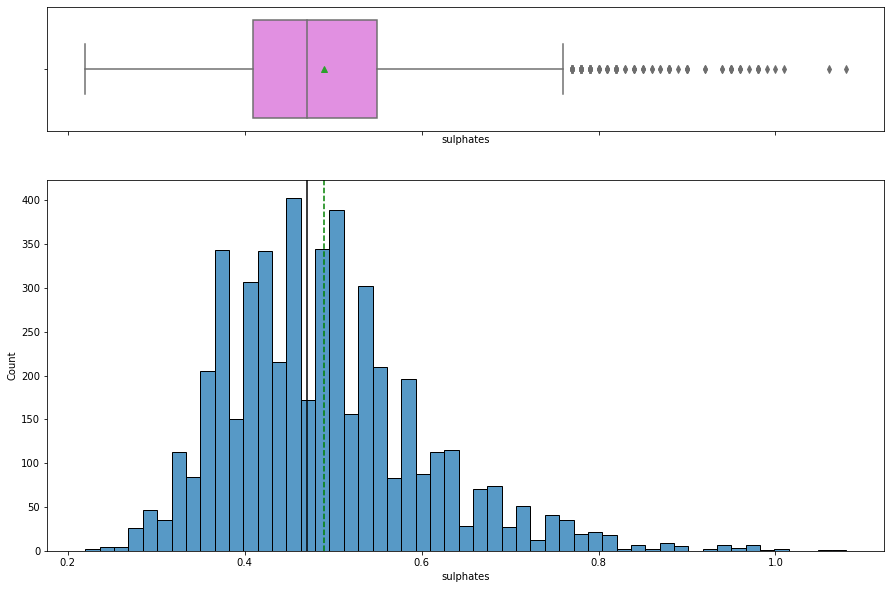

In [43]:
histogram_boxplot(databk1['sulphates'])

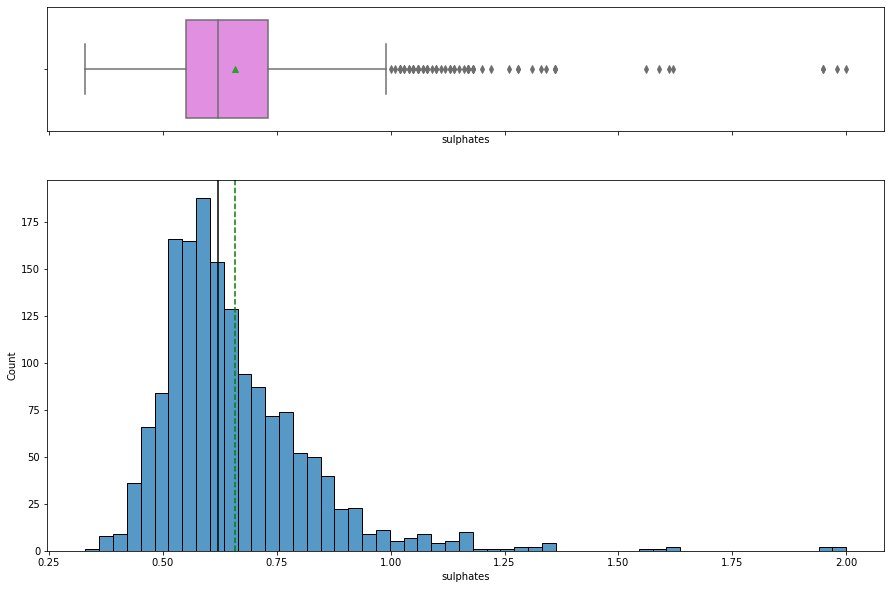

In [44]:
histogram_boxplot(databk2['sulphates'])

* The distribution of sulphates, which acts as antimicrobial and antioxidant in wines, is right-skewed.
* From boxplot, we can see that there are outliers in this variable i.e. some wines with a very high sulphates than others, can possibly be highly rated wines as sulphates would help them in preserving them for a longer time.

### Observations on alcohol

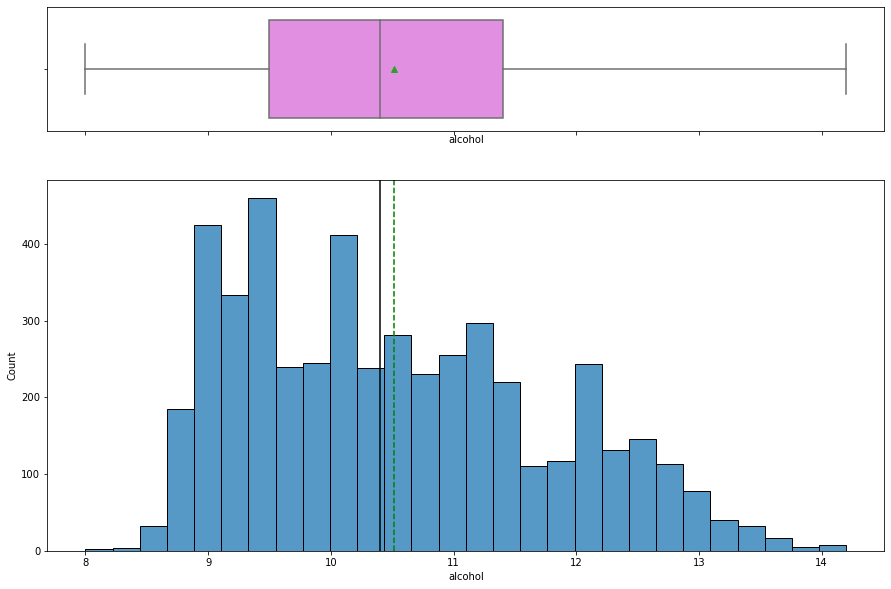

In [45]:
histogram_boxplot(databk1['alcohol'])

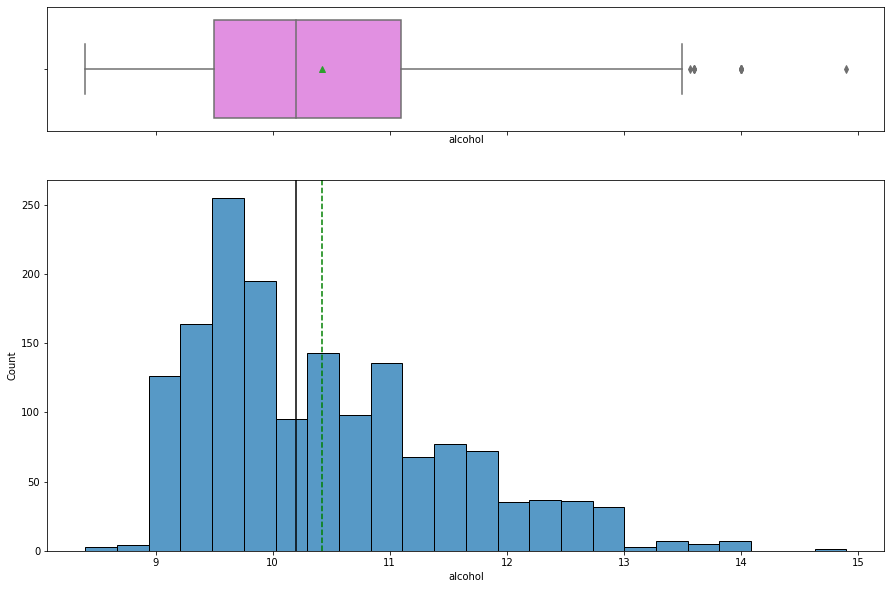

In [46]:
histogram_boxplot(databk2['alcohol'])

* Most wines have 9% to 10% of alcohol.
* From boxplot, we can see that there are some extreme values for wines having more than 13% of alcohol.

In [47]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.15 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

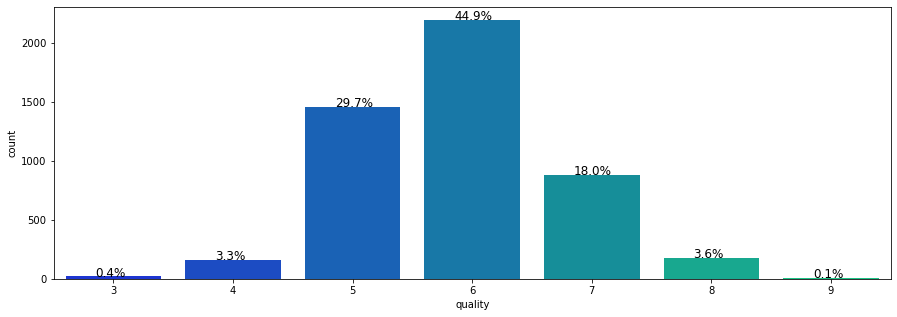

In [48]:
plt.figure(figsize=(15,5))
ax = sns.countplot(databk1["quality"],palette='winter')
perc_on_bar(ax,databk1["quality"])

* Most of the wines are rated either 5 or 6 and there are very less records for 3, 4, and 8 rated wines.
* The observations with 7 or 8 are very less. This might be due to the fact that these are high quality premium wines with maximum rating.
* We can combine records to create two broad categories - premium quality wines and non-premium quality wines, where quality:  2-6 can be one class and quality: 7-8 can be the other class.

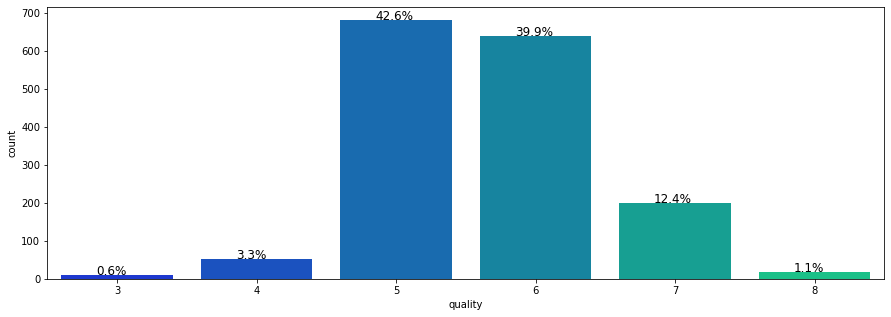

In [49]:
plt.figure(figsize=(15,5))
ax = sns.countplot(databk2["quality"],palette='winter')
perc_on_bar(ax,databk2["quality"])

In [104]:
# defining bins
bins = (2, 6, 8)
# defining labels
labels = ['non-premium', 'premium']

databk1['quality_class'] = pd.cut(x = databk1['quality'], bins = bins, labels = labels)

In [105]:
databk1['quality_class'].value_counts()

non-premium    3838
premium        1055
Name: quality_class, dtype: int64

In [106]:
databk2['quality_class'] = pd.cut(x = databk2['quality'], bins = bins, labels = labels)

In [107]:
databk2['quality_class'].value_counts()

non-premium    1382
premium         217
Name: quality_class, dtype: int64

* We have reduced the number of categories to only two categories.
* The classes are imbalanced as there are only 217 observations with premium class.

## Bivariate Analysis

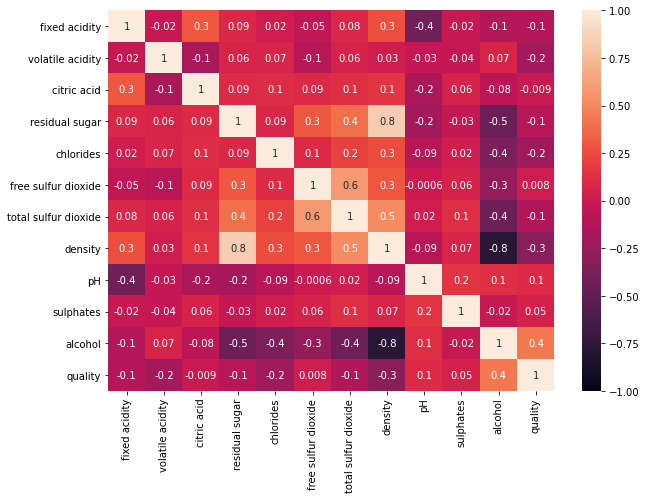

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(databk1.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

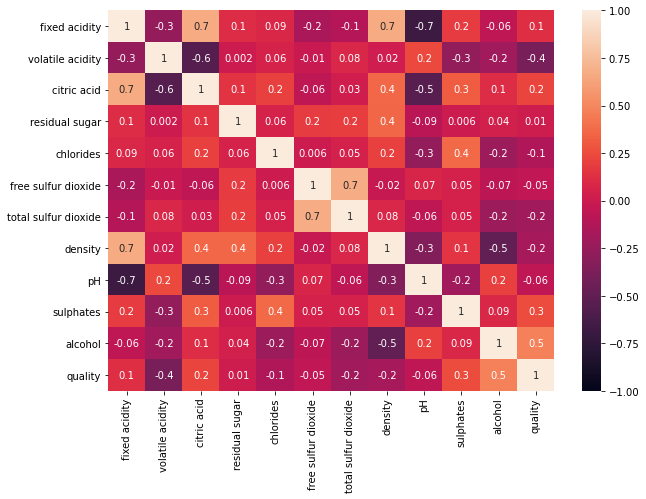

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(databk2.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* Fixed acidity has a strong positive correlation with citric acid and density.
* The total sulfur dioxide and free sulfur dioxide have a strong correlation.
* The quality of wine shows a moderate correlation with alcohol.

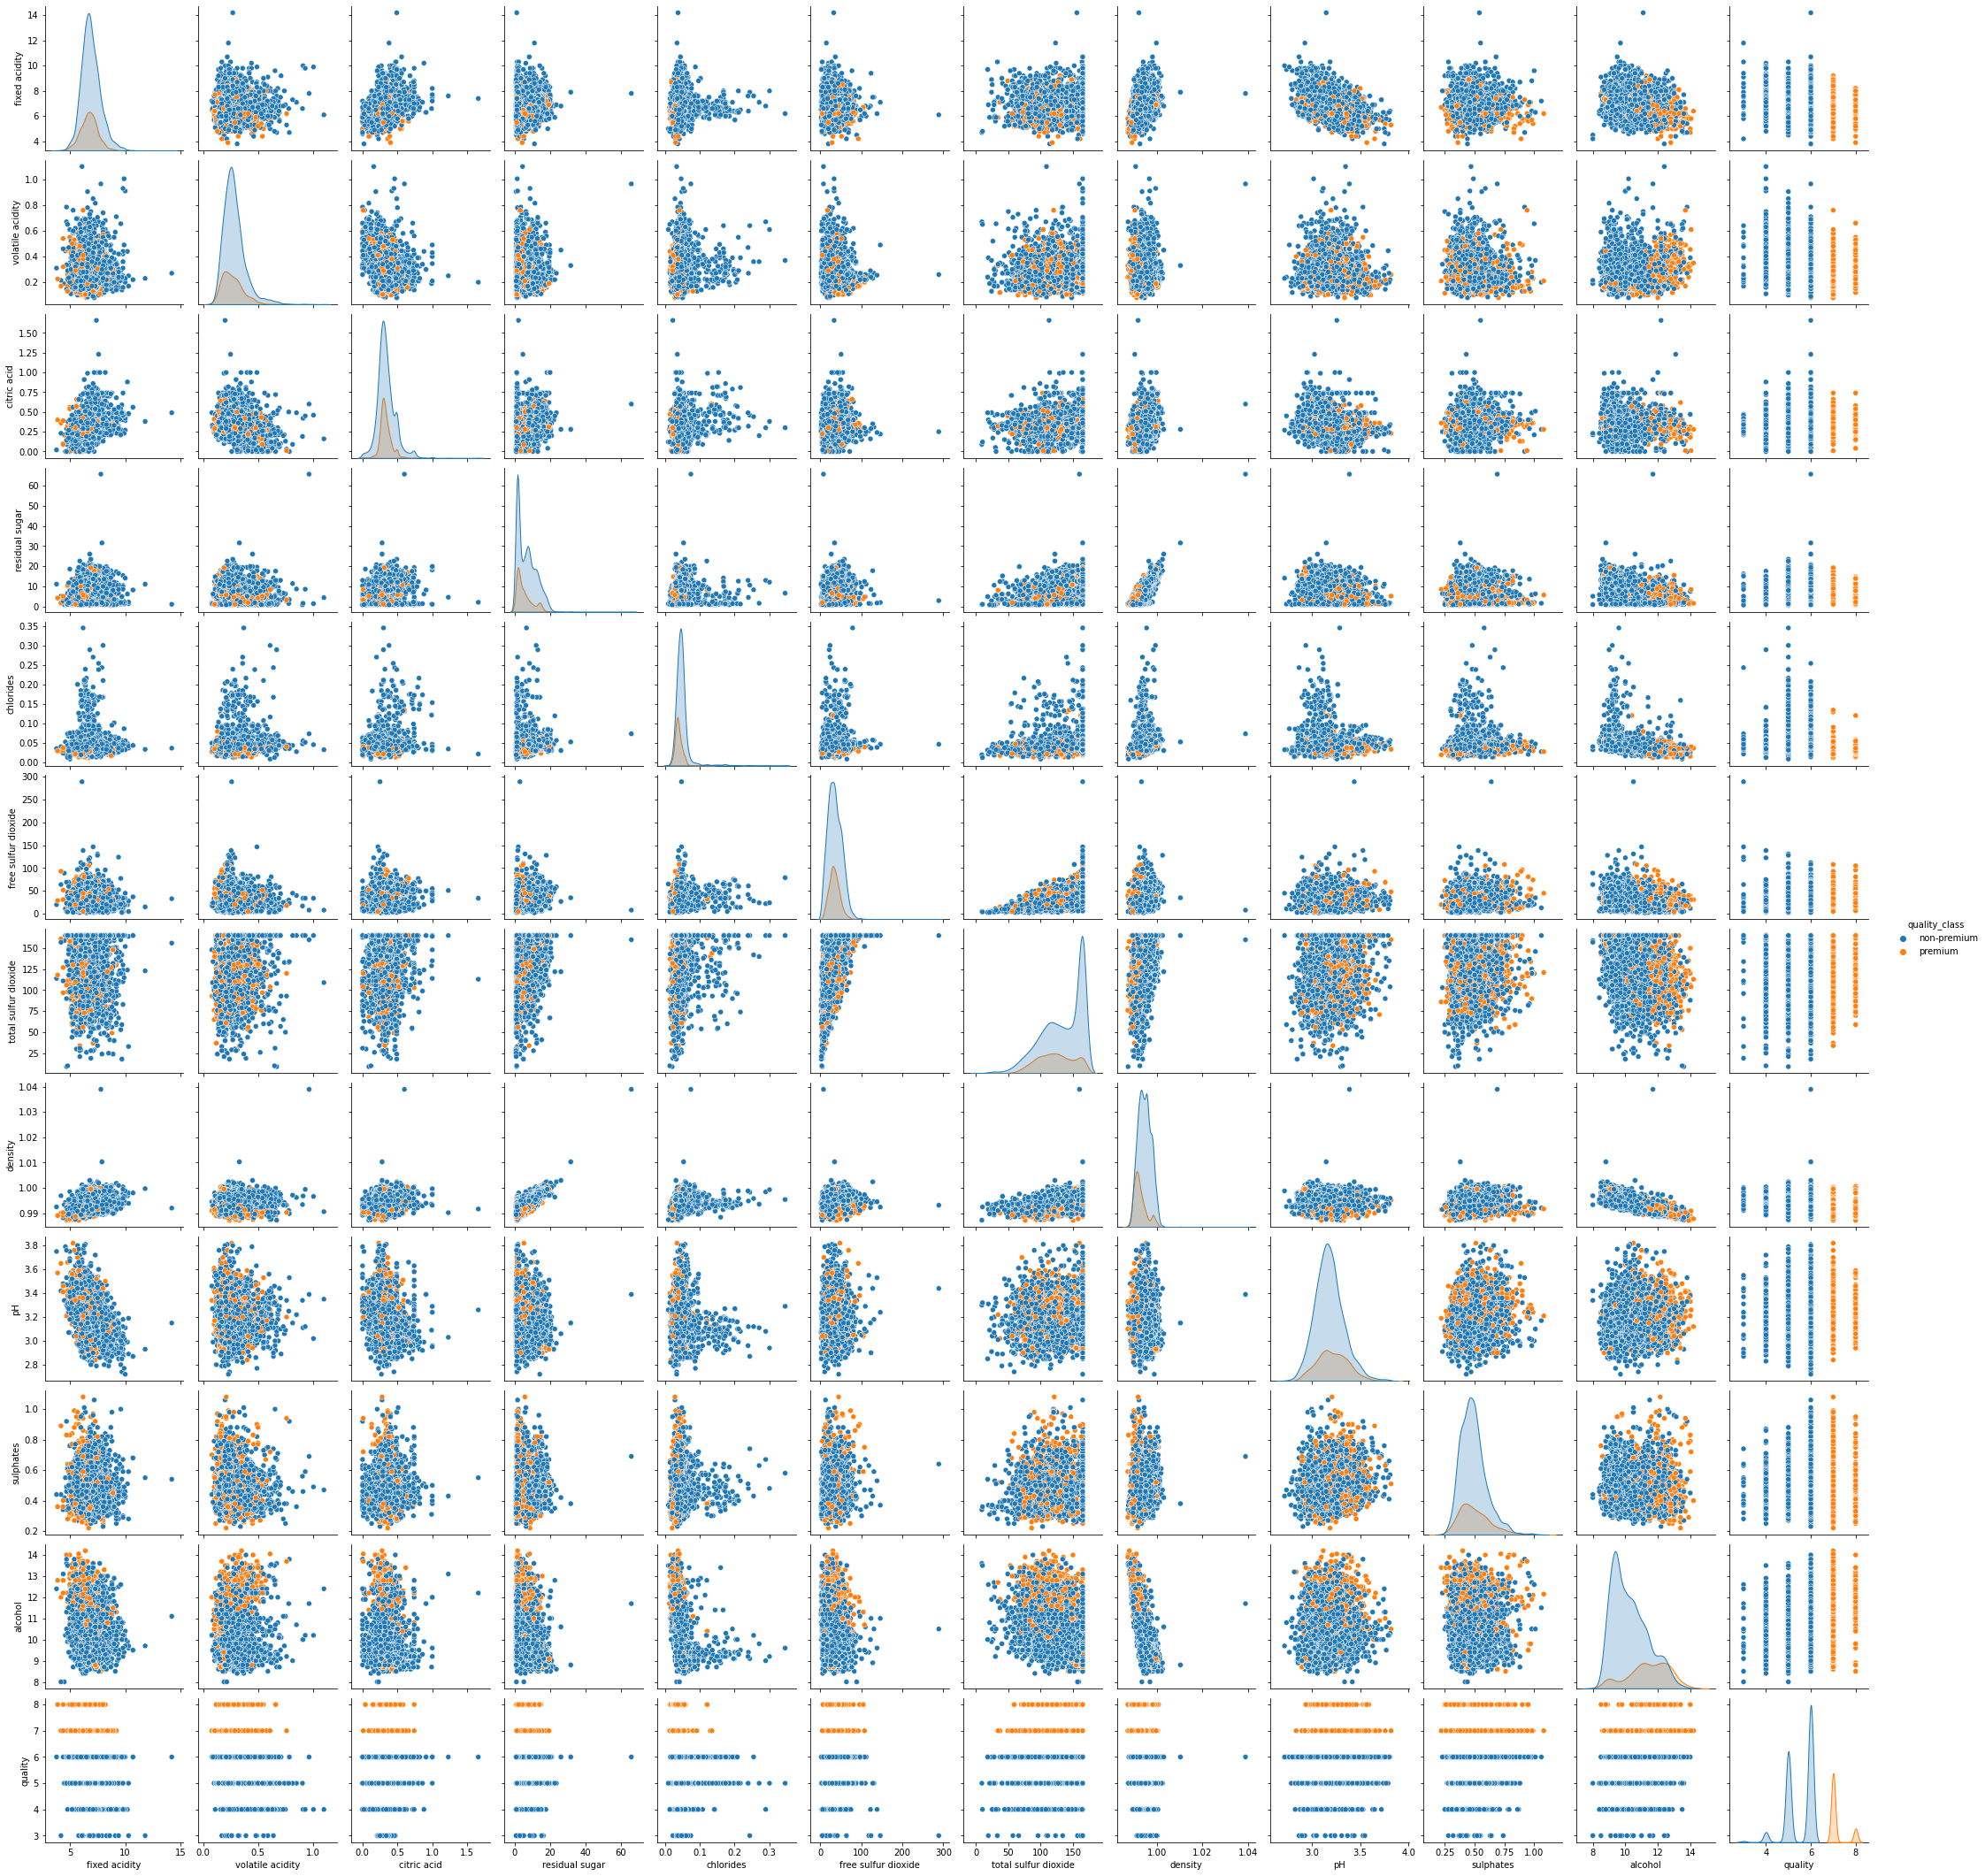

In [57]:
sns.pairplot(databk1,hue='quality_class')
plt.show()

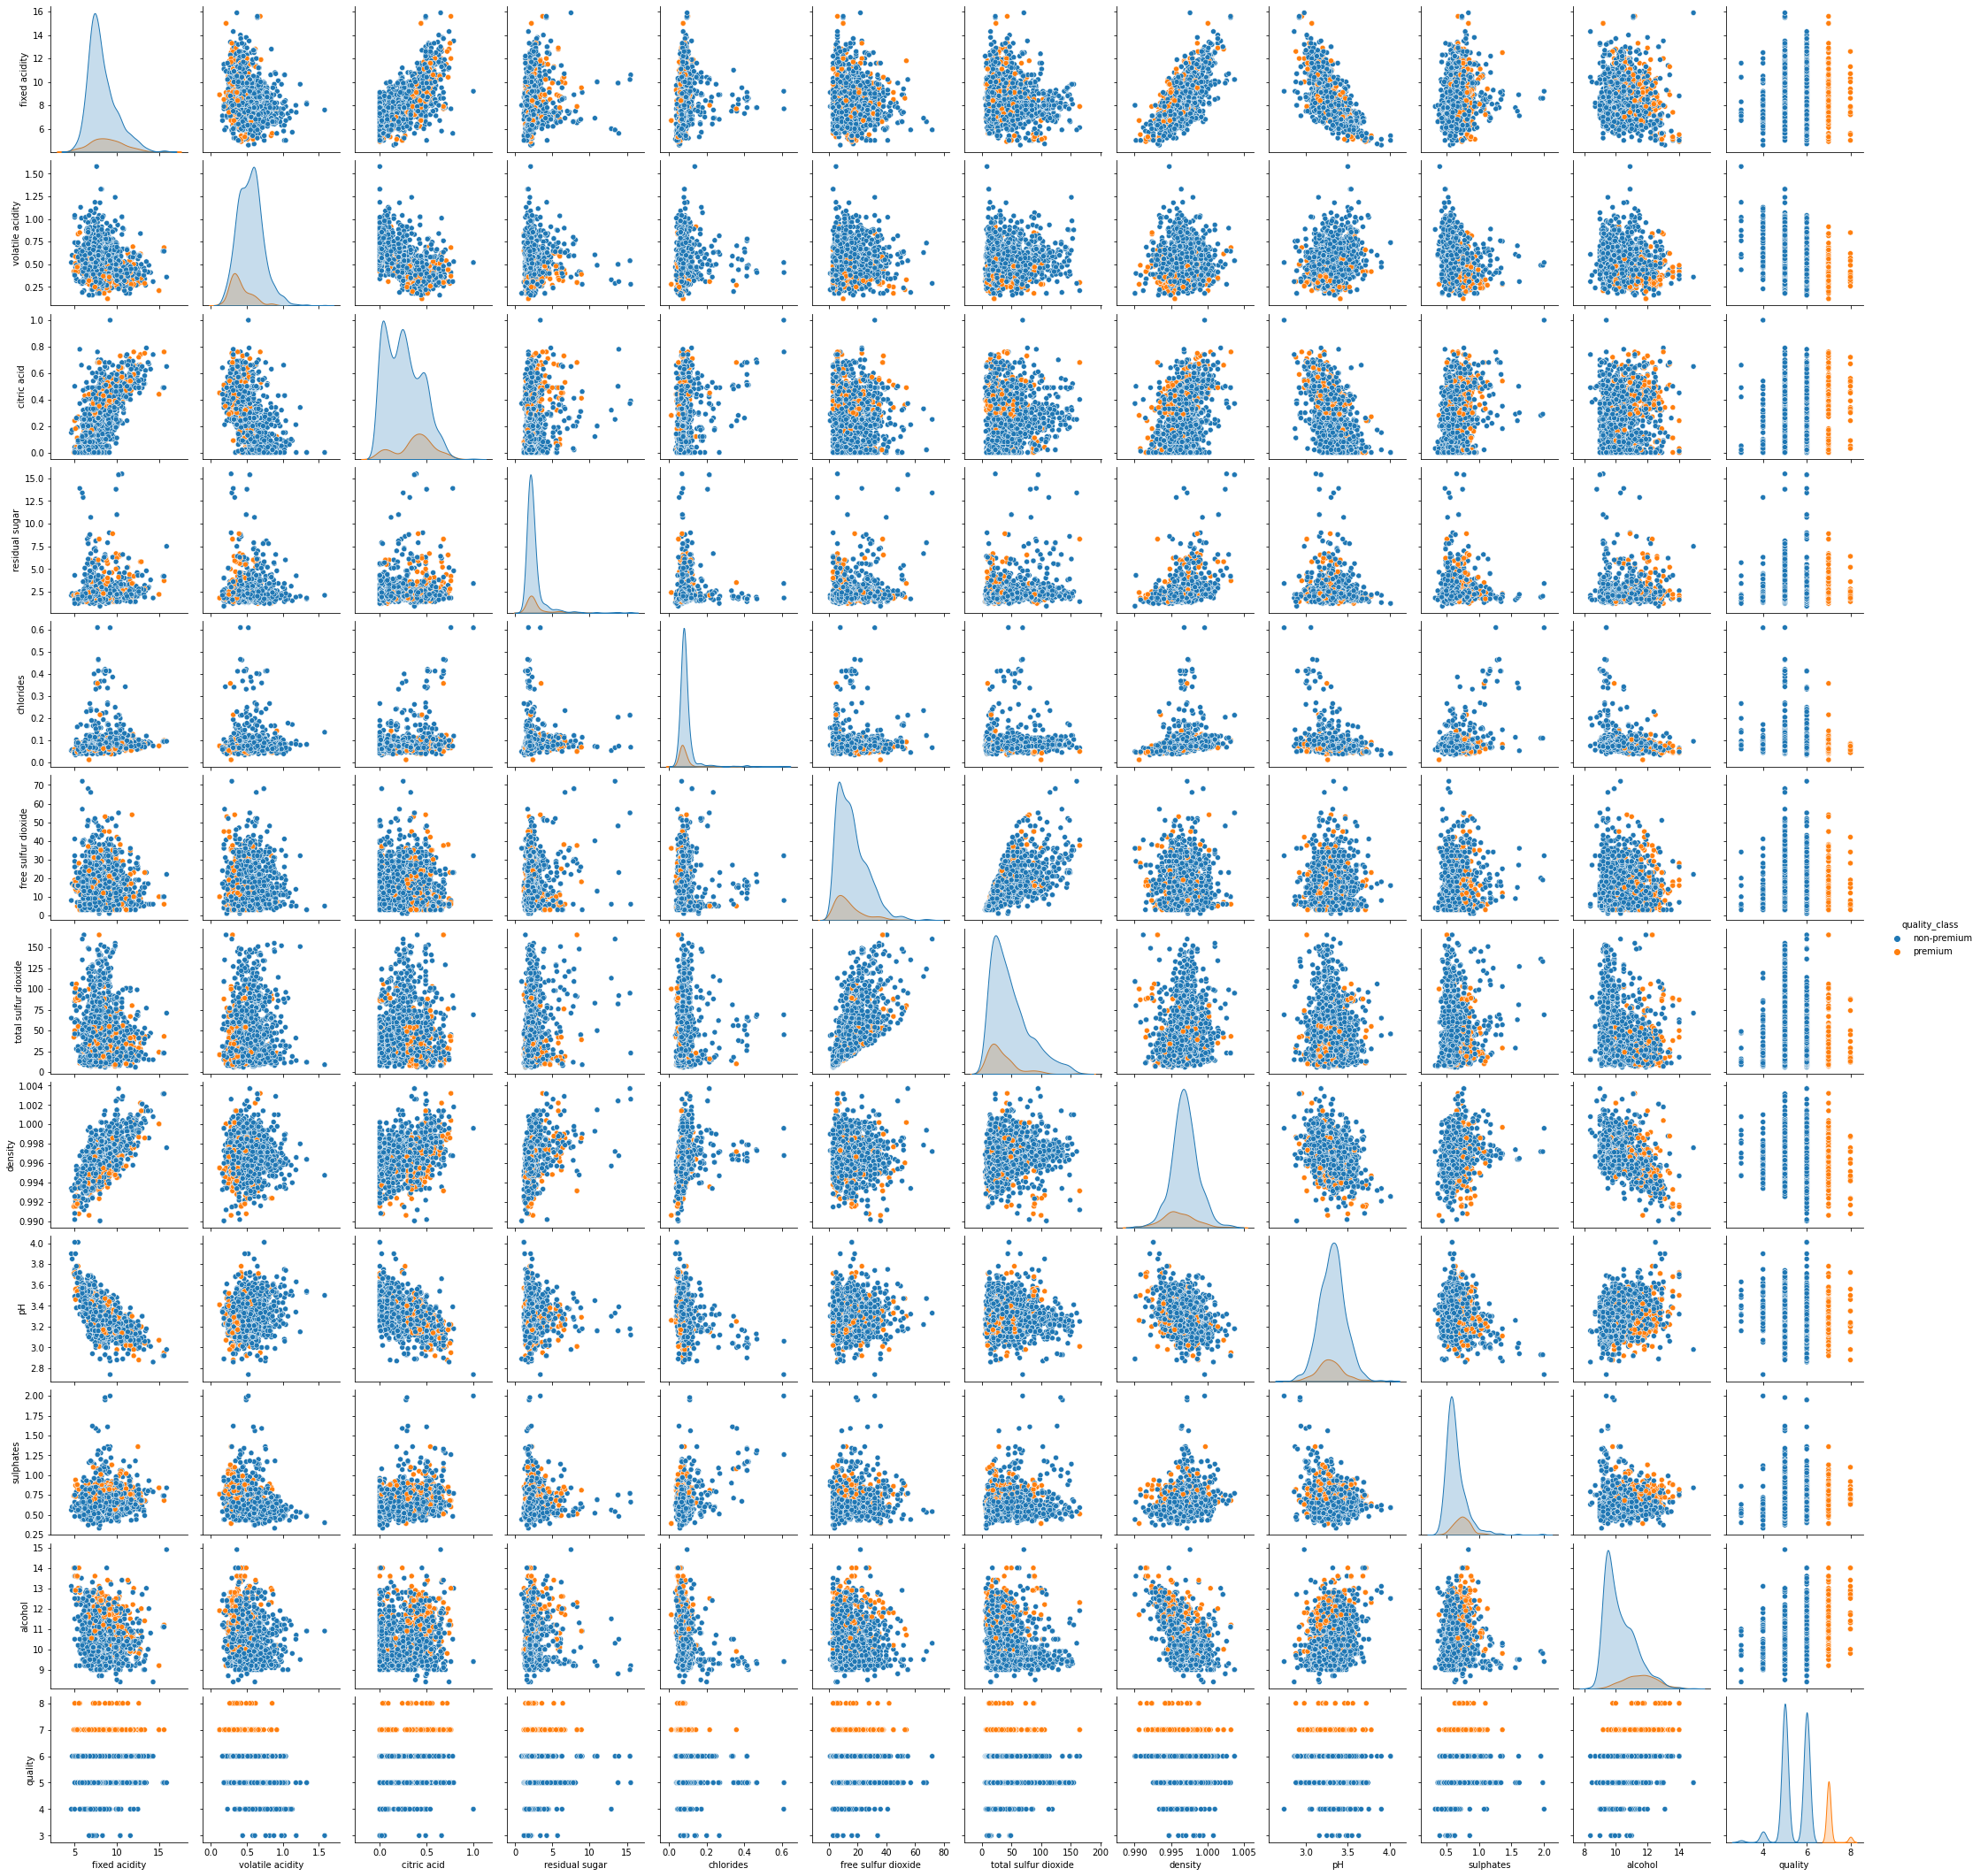

In [58]:
sns.pairplot(databk2,hue='quality_class')
plt.show()

* There are overlap in the distribution of variables for both the classes. Let's explore this further using other plots.

### Quality vs acidity

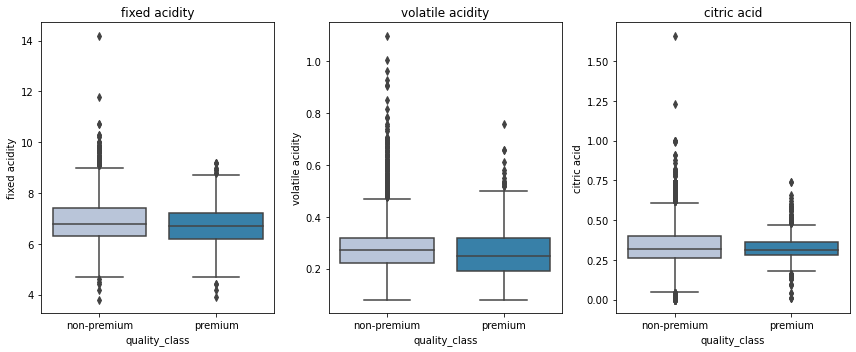

In [61]:
cols = databk1[['fixed acidity', 'volatile acidity', 'citric acid']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(databk1['quality_class'],databk1[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

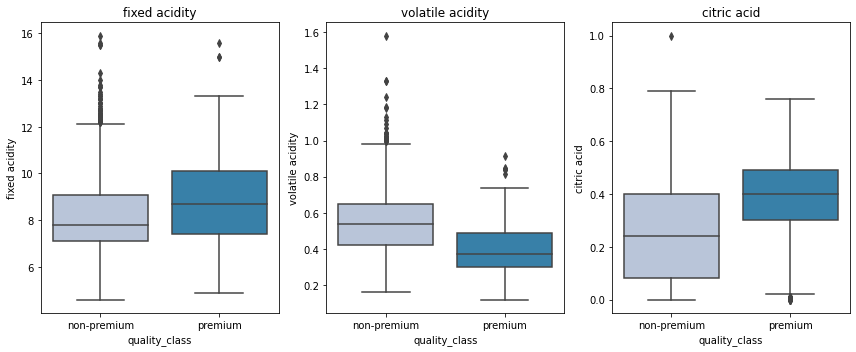

In [62]:
cols = databk2[['fixed acidity', 'volatile acidity', 'citric acid']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(databk2['quality_class'],databk2[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Premium wines have higher fixed acidity and citric acid and lower volatile acidity.

### Quality vs sulfur

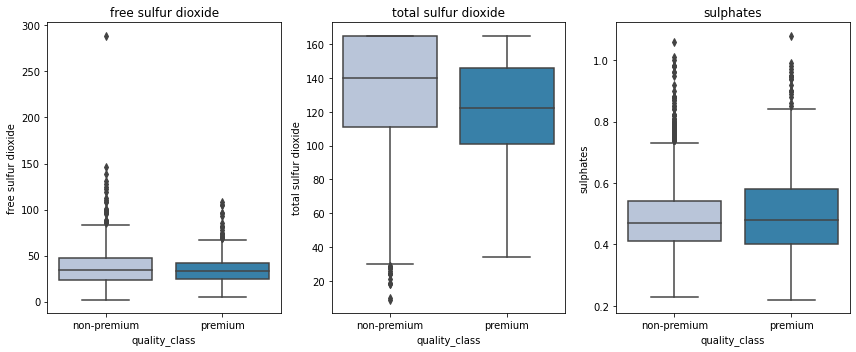

In [63]:
cols = databk1[['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(databk1['quality_class'],databk1[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

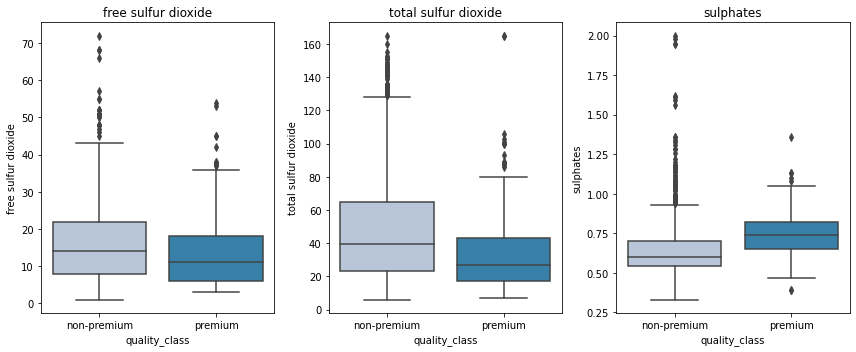

In [64]:
cols = databk2[['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(databk2['quality_class'],databk2[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Premium wines have less concentration of free sulfur dioxide and total sulfur dioxide but higher sulphates that helps in preserving them for a longer period.

### Quality vs chlorides

In [67]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(databk1['quality_class'],x,palette="PuBu")
    plt.show()

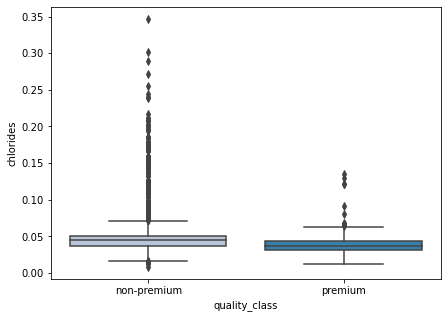

In [68]:
boxplot(databk1['chlorides'])

In [69]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(databk2['quality_class'],x,palette="PuBu")
    plt.show()

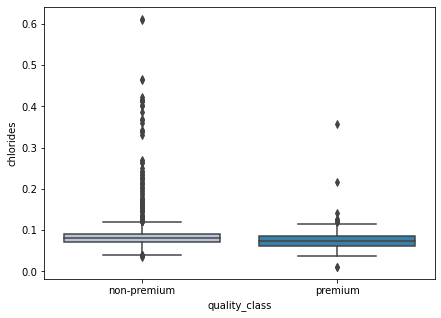

In [70]:
boxplot(databk2['chlorides'])

* There's not much difference between in the chlorides for both classes.
* There are many outliers for the non-premium wines. It is quite difficult to make an interpretation here, let's turn off the outliers and visualize again.

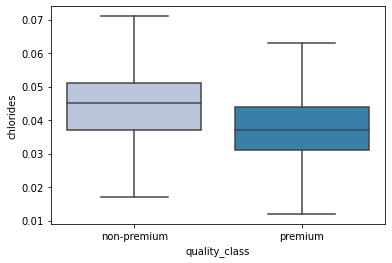

In [71]:
sns.boxplot(databk1['quality_class'],databk1['chlorides'],showfliers=False,palette='PuBu');

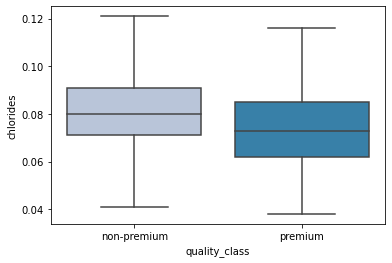

In [72]:
sns.boxplot(databk2['quality_class'],databk2['chlorides'],showfliers=False,palette='PuBu');

* Premium wines have lower concentration of chlorides in them.

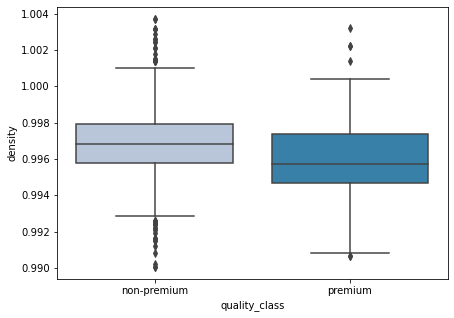

In [77]:
boxplot(databk2['density'])

* Premium wines have lesser density i.e. they have comparatively thinner than the non-premium wines.

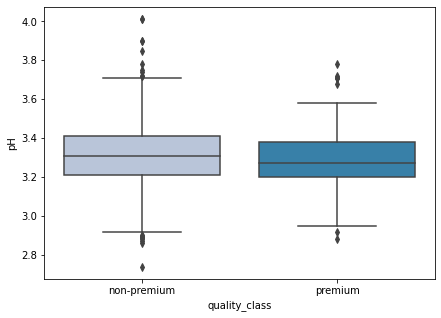

In [78]:
boxplot(databk2['pH'])

* There is not much difference between the pH value of both type of wines but range of pH value of non-premium wines is higher than the range of pH value of premium wines. This indicates that some non-premium wines are either too acidic or less acidic.

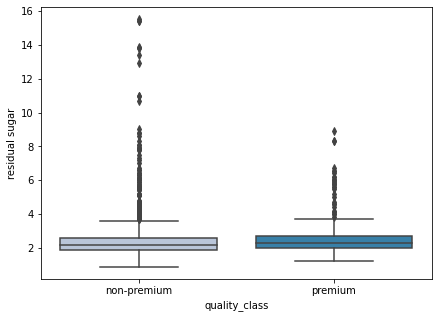

In [79]:
boxplot(databk2['residual sugar'])

* As we observed earlier some wines have high residual sugar, such wines are rated lower.

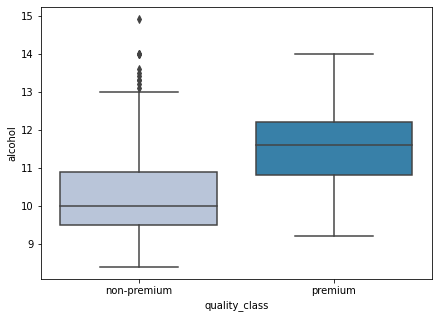

In [80]:
boxplot(databk2['alcohol'])

* Alcohol content plays a huge role in wine quality. We can see that premium wines have a higher alcohol content as compared to non-premium wines.

## Model Building - Approach
1. Data preparation
2. Split the data into train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparaneter tuning.
5. Test the performance on the test data.

## Split Data

In [175]:
databkfinal = pd.concat([databk1, databk2])

In [176]:
databkfinal.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality_class           6492
dtype: int64

In [187]:
X = databkfinal.drop('quality_class', axis=1)
y = databkfinal['quality_class'].apply(lambda x : 0 if x=='non-premium' else 1 )

In [189]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(4547, 11) (1950, 11)


In [126]:
databk1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [127]:
databk1.fillna(databk1.mean(), inplace=True)

In [131]:
databk1[:] = np.nan_to_num(databk1)

In [132]:
A = databk1.drop('quality_class', axis=1)
b = databk1['quality_class'].apply(lambda x : 0 if x=='non-premium' else 1 )

In [133]:
# Splitting data into training and test set:
A_train, A_test, b_train, b_test =train_test_split(A, b, test_size=0.3, random_state=1,stratify=b)
print(A_train.shape, A_test.shape)

(3428, 11) (1470, 11)


In [ ]:
df.fillna(df.mean(), inplace=True)

**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [190]:
y.value_counts(1)

0    0.803448
1    0.196552
Name: quality_class, dtype: float64

In [191]:
y_test.value_counts(1)

0    0.80359
1    0.19641
Name: quality_class, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a wine is of premium quality when it is of non-premium quality.
2. Predicting a wine is of non-premium quality when it is of premium quality.

### Which case is more important? 
1. If the model predicts a wine is of non-premium quality but it is of premium quality then the company would incur loss of good wine and resources used.
2. If the model predicts a wine is of premium quality but it is not then the company would roll out low-quality wine which would affect their customer base and their reputation. 

### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define function to provide metric scores on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [192]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [193]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.8256410256410256
Recall on training set :  1.0
Recall on test set :  0.6057441253263708
Precision on training set :  1.0
Precision on test set :  0.5510688836104513
F1-Score on training set :  1.0
F1-Score on test set :  0.5771144278606966


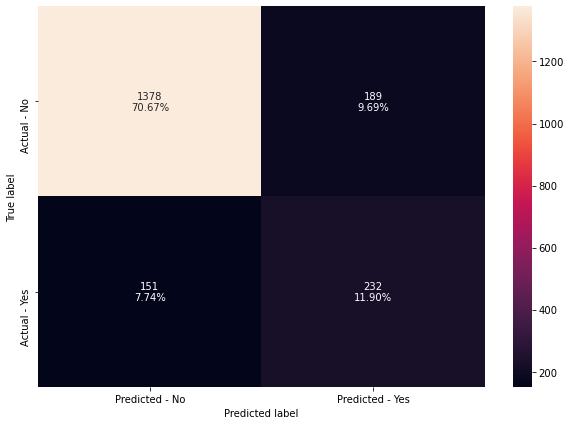

In [197]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* Decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [198]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

Accuracy on training set :  0.7393886078733231
Accuracy on test set :  0.7184615384615385
Recall on training set :  0.7997762863534675
Recall on test set :  0.7258485639686684
Precision on training set :  0.41545613015688554
Precision on test set :  0.3850415512465374
F1-Score on training set :  0.5468451242829827
F1-Score on test set :  0.5031674208144796


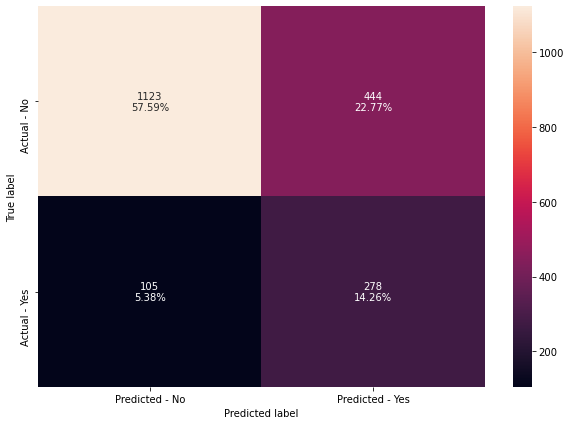

In [199]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

* The overfitting has reduced but the test f1-score has also decreased.
* Let's try some other models.

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.8887179487179487
Recall on training set :  1.0
Recall on test set :  0.5639686684073107
Precision on training set :  1.0
Precision on test set :  0.8120300751879699
F1-Score on training set :  1.0
F1-Score on test set :  0.6656394453004623


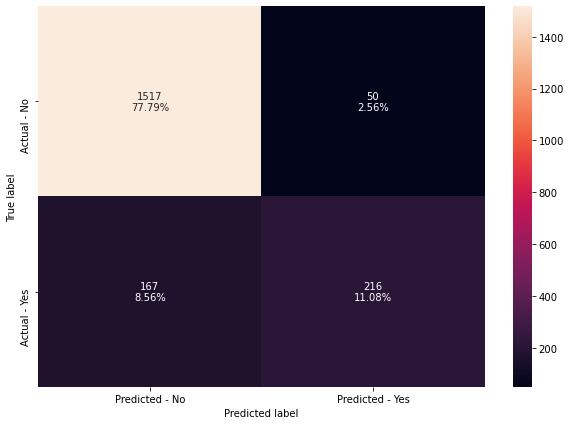

In [200]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Random forest is giving slightly higher test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [201]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features='sqrt', min_samples_split=7, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.9665713657356498
Accuracy on test set :  0.8743589743589744
Recall on training set :  0.9899328859060402
Recall on test set :  0.6840731070496083
Precision on training set :  0.8608949416342413
Precision on test set :  0.6787564766839378
F1-Score on training set :  0.9209157127991676
F1-Score on test set :  0.681404421326398


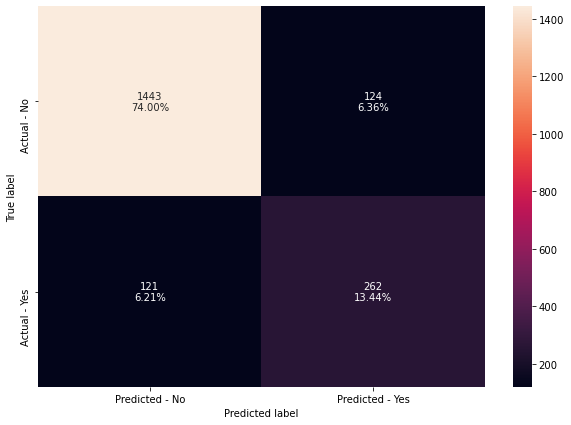

In [202]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score has increased.

## Bagging Classifier

Accuracy on training set :  0.9881240378271388
Accuracy on test set :  0.8666666666666667
Recall on training set :  0.9429530201342282
Recall on test set :  0.4621409921671018
Precision on training set :  0.9964539007092199
Precision on test set :  0.7662337662337663
F1-Score on training set :  0.9689655172413794
F1-Score on test set :  0.5765472312703583


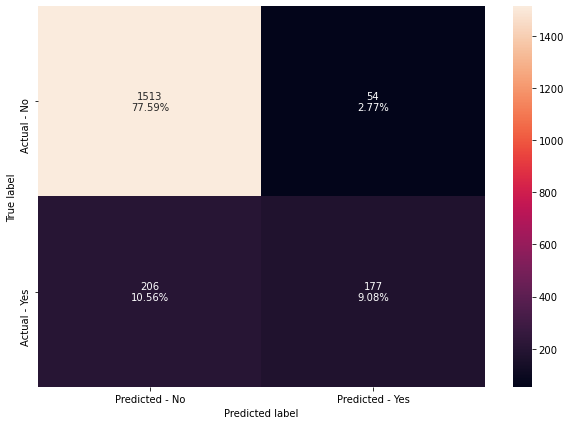

In [203]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* Bagging classifier is overfiiting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [204]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=40,
                  random_state=1)

Accuracy on training set :  0.9984605234220365
Accuracy on test set :  0.8835897435897436
Recall on training set :  0.9921700223713646
Recall on test set :  0.5300261096605744
Precision on training set :  1.0
Precision on test set :  0.812
F1-Score on training set :  0.9960696238068502
F1-Score on test set :  0.6413902053712479


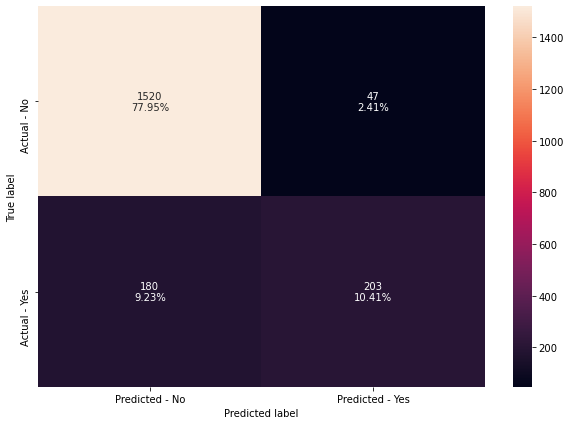

In [205]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

* Surprisingly,the model performance has decreased after hyperparameter tuning.
* Let's try now try boosting models.

## AdaBoost Classifier

Accuracy on training set :  0.8284583241697823
Accuracy on test set :  0.8261538461538461
Recall on training set :  0.3512304250559284
Recall on test set :  0.3289817232375979
Precision on training set :  0.6108949416342413
Precision on test set :  0.6057692307692307
F1-Score on training set :  0.44602272727272724
F1-Score on test set :  0.4263959390862944


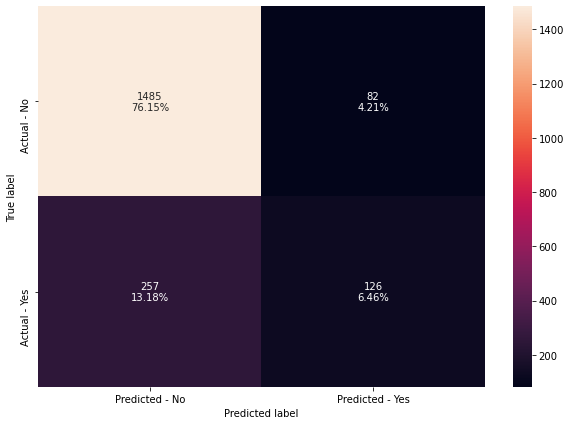

In [206]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [207]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

Accuracy on training set :  0.9799868044864746
Accuracy on test set :  0.8589743589743589
Recall on training set :  0.9317673378076062
Recall on test set :  0.566579634464752
Precision on training set :  0.9652375434530707
Precision on test set :  0.6656441717791411
F1-Score on training set :  0.948207171314741
F1-Score on test set :  0.6121297602256699


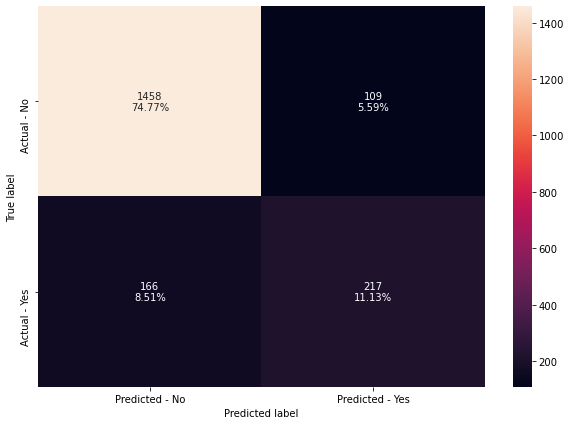

In [208]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

## Gradient Boosting Classifier

Accuracy on training set :  0.8720035188036068
Accuracy on test set :  0.8435897435897436
Recall on training set :  0.47874720357941836
Recall on test set :  0.35509138381201044
Precision on training set :  0.7867647058823529
Precision on test set :  0.7010309278350515
F1-Score on training set :  0.5952712100139081
F1-Score on test set :  0.47140381282495664


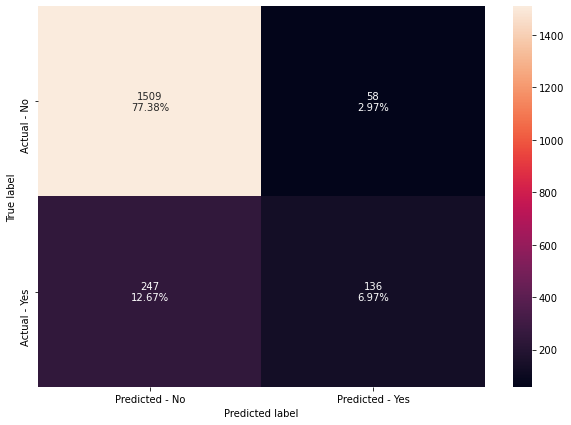

In [209]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

* The gradient boosting classifier is overfitting the training data.

### Hyperparameter Tuning

In [210]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9109302837035408
Accuracy on test set :  0.8502564102564103
Recall on training set :  0.6252796420581656
Recall on test set :  0.42297650130548303
Precision on training set :  0.8887122416534181
Precision on test set :  0.6952789699570815
F1-Score on training set :  0.7340774786605384
F1-Score on test set :  0.525974025974026


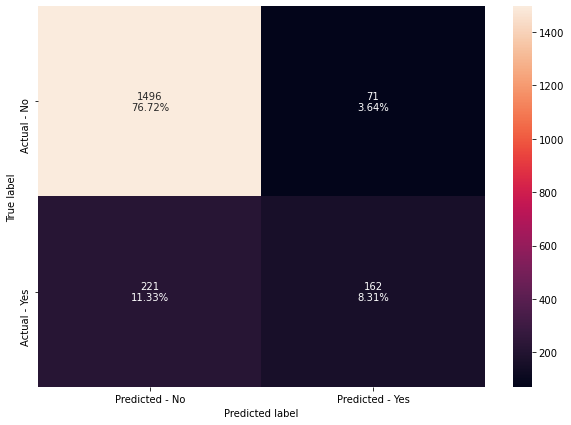

In [211]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

* There is not much difference in the model performance after hyperparameter tuning.

## XGBoost Classifier

Accuracy on training set :  0.9991202990983066
Accuracy on test set :  0.8856410256410256
Recall on training set :  0.9955257270693513
Recall on test set :  0.6109660574412533
Precision on training set :  1.0
Precision on test set :  0.7597402597402597
F1-Score on training set :  0.9977578475336324
F1-Score on test set :  0.6772793053545586


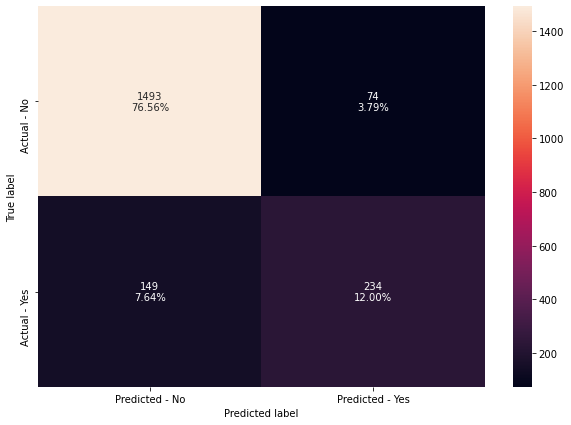

In [212]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

* Xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [213]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9146690125357378
Accuracy on test set :  0.8287179487179487
Recall on training set :  0.9899328859060402
Recall on test set :  0.7754569190600522
Precision on training set :  0.7001582278481012
Precision on test set :  0.544954128440367
F1-Score on training set :  0.820203892493049
F1-Score on test set :  0.6400862068965517


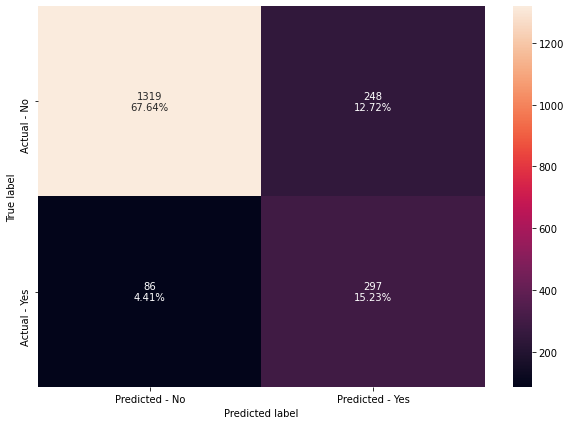

In [214]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

## Stacking Classifier

In [215]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=1,
                                               

Accuracy on training set :  0.884539256652738
Accuracy on test set :  0.7933333333333333
Recall on training set :  0.9988814317673378
Recall on test set :  0.835509138381201
Precision on training set :  0.6302046577275935
Precision on test set :  0.48484848484848486
F1-Score on training set :  0.7728256166161834
F1-Score on test set :  0.613614573346117


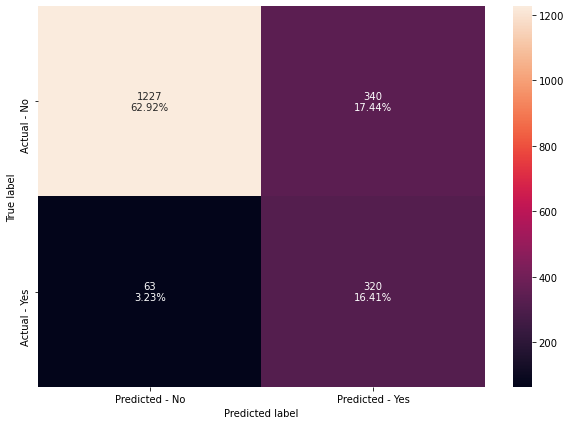

In [216]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

* The stacking classifier is giving similar performance as compared to XGBoost with slightly less overfitting.
* The confusion matrix shows that the model is able to identify the majority of premium quality wines but it is better at identifying non-premium quality wines.

## Comparing all models

In [217]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [218]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
3                  Tuned Random Forest        0.966571       0.874359   
10                  XGBoost Classifier        0.999120       0.885641   
2                        Random Forest        1.000000       0.888718   
5             Bagging Classifier Tuned        0.998461       0.883590   
11            Tuned XGBoost Classifier        0.914669       0.828718   
12                 Stacking Classifier        0.884539       0.793333   
7            Tuned AdaBoost Classifier        0.979987       0.858974   
0                        Decision Tree        1.000000       0.825641   
4                   Bagging Classifier        0.988124       0.866667   
9   Tuned Gradient Boosting Classifier        0.910930       0.850256   
1                  Tuned Decision Tree        0.739389       0.718462   
8         Gradient Boosting Classifier        0.872004       0.843590   
6                  AdaBoost Classifier        0.828458       0.826154   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
3       0.989933     0.684073         0.860895        0.678756   
10      0.995526     0.610966         1.000000        0.759740   
2       1.000000     0.563969         1.000000        0.812030   
5       0.992170     0.530026         1.000000        0.812000   
11      0.989933     0.775457         0.700158        0.544954   
12      0.998881     0.835509         0.630205        0.484848   
7       0.931767     0.566580         0.965238        0.665644   
0       1.000000     0.605744         1.000000        0.551069   
4       0.942953     0.462141         0.996454        0.766234   
9       0.625280     0.422977         0.888712        0.695279   
1       0.799776     0.725849         0.415456        0.385042   
8       0.478747     0.355091         0.786765        0.701031   
6       0.351230     0.328982         0.610895        0.605769   

    Train_F1-Score  Test_F1-Score  
3         0.920916       0.681404  
10        0.997758       0.677279  
2         1.000000       0.665639  
5         0.996070       0.641390  
11        0.820204       0.640086  
12        0.772826       0.613615  
7         0.948207       0.612130  
0         1.000000       0.577114  
4         0.968966       0.576547  
9         0.734077       0.525974  
1         0.546845       0.503167  
8         0.595271       0.471404  
6         0.446023       0.426396

* Majority of the models are overfitting the training data in terms of f1-score.
* Bagging classifier is giving the highest f1-score on the test data but is overfitting the training data.
* The tuned random forest has given the second highest test f1-score and is giving more generalized performance as compared to the bagging classifier. 

### Feature importance of Tuned Random Forest

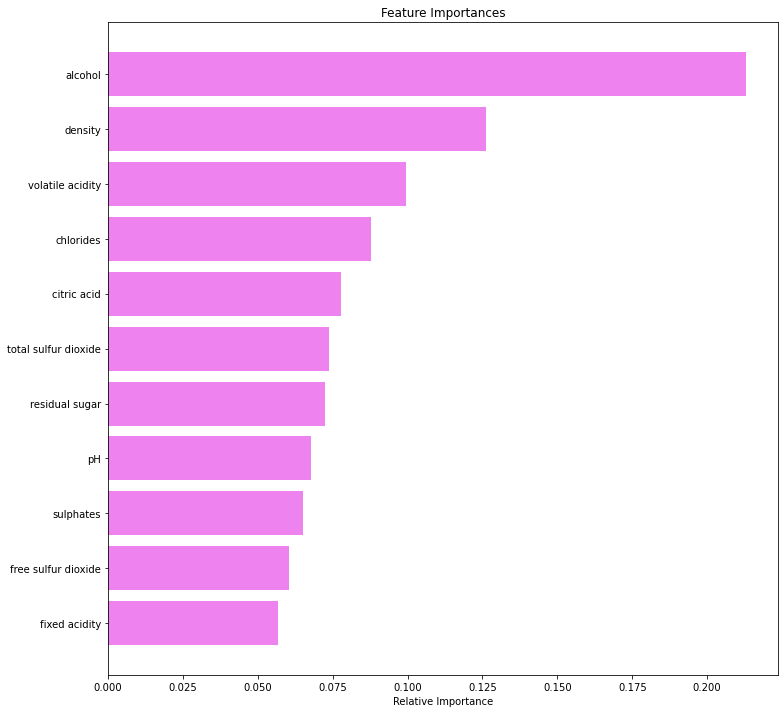

In [219]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Alcohol is the most important feature in identifying premium quality wine followed by sulphates and volatile acidity.

## Conclusion:

- On the basis of our analysis, we can say that the premium quality wine has following features in comparison to the non-premium quality wine: 
    - Higher concentration of alcohol.
    - A fair and higher concentration of sulphates. Fair indicates smaller range of values or less extreme values. 
    - Less volatile acidity.
    - Higher fixed acidity.
    - Higher citric acid concentration.
    - A fair and lower concentration of total sulfur dioxide and free sulfur dioxide.
    - Lower concentration of chlorides.
    - Lesser density.
    - A fair pH level i.e. neither very acidic or very less acidic.
- The company should be more precise with the concentration and level of alcohol, volatile acidity, and sulphates as these are the most important factors in determining the quality of wines. For example, the common alcohol level for the premium quality wine should be between 11-13%.
- Once the desired performance is achieved from the model, the company can use it to identify the premium quality wines for new production. This would help to reduce the cost and increase the efficiency of the process.